# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    IV. Summary 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How are violent crimes, in particular murder, capital murder, aggrivated assault, and rape distributed?
><li><a href="#q8"> 8. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q9"> 9. How does violent crime appear on the map?
><li><a href="#q10"> 10. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
%matplotlib inline
plt.style.use("seaborn-dark")

In [2]:
df = pd.read_csv("crime_reports.csv")

In [3]:
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288919 entries, 0 to 2288918
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    20870
Address                             12
Zip Code                         14031
Council District                 47054
APD Sector                        8912
APD District                      9386
PRA                              10638
Census Tract                   1520230
Clearance Status                604836
Clearance Date                  335630
UCR Category                   1509265
Category Description           1509265
X-coordinate                     10063
Y-coordinate                     10063
Latitude                         38644
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20183000009,DATING DISTURBANCE,2400,N,10/27/2018 12:03:00 AM,10/27/2018,3.0,10/27/2018 12:28:00 AM,10/27/2018,28.0,PARKING LOTS / GARAGE,2201 MONTOPLOIS DR,NaN,NaN,NaN,NaN,NaN,NaN,N,10/31/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20141381413,FAMILY DISTURBANCE,3400,N,05/18/2014 07:09:00 PM,05/18/2014,1909.0,05/18/2014 07:09:00 PM,05/18/2014,1909.0,RESIDENCE / HOME,12836 BUENOS ARIES PKWY,NaN,NaN,NaN,NaN,NaN,NaN,N,05/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20081002040,CRASH/FAIL STOP AND RENDER AID,3604,N,04/09/2008 07:04:00 PM,04/09/2008,1904.0,04/09/2008 09:08:00 PM,04/09/2008,2108.0,STREETS / HWY / ROAD / ALLEY,2500 BLOCK OF GUADALUPE,NaN,NaN,NaN,NaN,NaN,NaN,N,12/16/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20161971680,DWI,2100,N,07/15/2016 10:15:00 PM,07/15/2016,2215.0,07/16/2016 12:22:00 AM,07/16/2016,22.0,STREETS / HWY / ROAD / ALLEY,6000 BLK OF BOLM RD,NaN,NaN,NaN,NaN,NaN,NaN,C,01/03/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20135029070,PROTECTIVE ORDER,3829,N,06/28/2013 12:15:00 PM,06/28/2013,1215.0,06/28/2013 12:15:00 PM,06/28/2013,1215.0,RESIDENCE / HOME,COHISE COUNTY AZ,NaN,NaN,NaN,NaN,NaN,NaN,N,06/28/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2288914,2020951013,THEFT BY SHOPLIFTING,607,N,04/04/2020 08:01:00 PM,04/04/2020,2001.0,04/04/2020 08:01:00 PM,04/04/2020,2001.0,DEPARTMENT / DISCOUNT STORE,710 E BEN WHITE BLVD SVRD WB,NaN,NaN,DA,2,480,NaN,C,04/04/2020,23C,Theft,3111086.0,3111086.0,30.218415,-97.754358,"(30.21841503, -97.75435779)"
2288915,20132071704,VIOL CITY ORDINANCE - OTHER,3299,N,07/26/2013 07:54:00 PM,07/26/2013,1954.0,07/26/2013 07:54:00 PM,07/26/2013,1954.0,STREETS / HWY / ROAD / ALLEY,400 BLOCK NECHES ST,78701.0,9.0,GE,2,382,NaN,C,08/13/2013,NaN,NaN,3115585.0,3115585.0,30.265413,-97.738848,"(30.26541298, -97.73884756)"
2288916,2003924076801,BURGLARY OF RESIDENCE,500,N,01/04/2003 06:30:00 PM,01/04/2003,1830.0,01/05/2003 10:31:00 AM,01/05/2003,1031.0,RESIDENCE / HOME,1809 SANCHEZ ST,78702.0,1.0,CH,3,394,8.0,N,NaN,220,Burglary,3125587.0,3125587.0,30.281489,-97.706719,"(30.28148881, -97.70671938)"
2288917,2006902409,BURGLARY NON RESIDENCE,502,N,03/31/2006 10:46:00 PM,03/31/2006,2246.0,03/31/2006 10:46:00 PM,03/31/2006,2246.0,COMMERCIAL / OFFICE BUILDING,6016 OLD FREDERICKSBURG RD,78749.0,8.0,DA,6,78,NaN,NaN,05/10/2006,220,Burglary,3081299.0,3081299.0,30.234197,-97.848283,"(30.2341966, -97.8482829)"
2288918,2010232299,FAMILY DISTURBANCE,3400,N,01/23/2010 10:44:00 PM,01/23/2010,2244.0,01/24/2010 12:14:00 AM,01/24/2010,14.0,RESIDENCE / HOME,9307 GEORGIAN DR,78753.0,4.0,ED,1,250,18.0,N,02/06/2010,NaN,NaN,3129098.0,3129098.0,30.360317,-97.693437,"(30.36031662, -97.69343723)"


## II. Data Scrubbing

There are several columns of data we don't need. We'll drop those and also scrub the Columns were keeping for analysis. Mainly, we want the zip code and address columns to be free of nulls and duplicates. We'll also create new columns for time series analysis. 

In [4]:
def clean_data(df):
    drop_col = [
        "Occurred Time",
        "Occurred Date",
        "Highest Offense Code",
        "Census Tract",
        "Family Violence",
        "Clearance Status",
        "PRA",
        "Report Date",
        "Report Time",
        "Clearance Date",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]

    clean_col = ["Occurred Date Time", "Report Date Time"]

    df.drop(drop_col, axis=1, inplace=True)
    df.dropna(subset=clean_col, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

    date_col = ["occurred_date_time", "report_date_time"]

    cat_col = ["highest_offense_description", "location_type", "apd_sector"]

    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)

    return df


df = clean_data(df)

In [5]:
display(df.info())
print("----------------------------------")
display(df.isnull().sum())
print("----------------------------------")
display(df.head())
print("----------------------------------")
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2288754 entries, 2003-01-01 00:00:00 to 2020-11-28 20:25:00
Data columns (total 16 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   incident_number              int64         
 1   highest_offense_description  category      
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     float64       
 6   council_district             float64       
 7   apd_sector                   category      
 8   apd_district                 object        
 9   latitude                     float64       
 10  longitude                    float64       
 11  year                         int64         
 12  month                        int64         
 13  week                         int64         
 14  day                          int64         
 15  hour            

None

----------------------------------


incident_number                    0
highest_offense_description        0
report_date_time                   0
location_type                  20786
address                           12
zip_code                       14018
council_district               47041
apd_sector                      8910
apd_district                    9384
latitude                       38638
longitude                      38638
year                               0
month                              0
week                               0
day                                0
hour                               0
dtype: int64

----------------------------------


,incident_number,highest_offense_description,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,latitude,longitude,year,month,week,day,hour
occurred_date_time,,,,,,,,,,,,,,,,
2003-01-01,2005901307,SEXUAL ASSAULT OF CHILD/OBJECT,2005-03-31 16:40:00,RESIDENCE / HOME,6600 BLOCK ED BLUESTEIN BLVD,78723.0,NaN,ED,3,NaN,NaN,2003,1,1,1,0
2003-01-01,20035015514,IDENTITY THEFT,2003-10-06 10:52:00,RESIDENCE / HOME,5708 WHITEBROOK DR,78724.0,1.0,CH,7,30.305744,-97.655117,2003,1,1,1,0
2003-01-01,20125057357,IDENTITY THEFT,2012-12-27 16:17:00,RESIDENCE / HOME,1738 RUTLAND DR,78758.0,4.0,ED,2,30.376093,-97.710471,2003,1,1,1,0
2003-01-01,20105018815,IDENTITY THEFT,2010-04-14 14:59:00,RESIDENCE / HOME,1088 PARK PLZ,78753.0,4.0,ED,3,30.348871,-97.685233,2003,1,1,1,0
2003-01-01,20125033273,AGG SEXUAL ASSAULT CHILD/OBJEC,2012-07-18 12:00:00,RESIDENCE / HOME,1100 BLOCK HARVEY ST,78702.0,1.0,CH,2,NaN,NaN,2003,1,1,1,0


----------------------------------


,incident_number,highest_offense_description,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,latitude,longitude,year,month,week,day,hour
occurred_date_time,,,,,,,,,,,,,,,,
2020-11-28 18:23:00,20205048526,DWI,2020-11-28 19:51:00,STREETS / HWY / ROAD / ALLEY,404 RIO GRANDE ST,78701.0,9.0,GE,1,30.268510,-97.750431,2020,11,48,28,18
2020-11-28 18:23:00,20205048528,DWI,2020-11-28 19:53:00,STREETS / HWY / ROAD / ALLEY,404 RIO GRANDE ST,78701.0,9.0,GE,1,30.268510,-97.750431,2020,11,48,28,18
2020-11-28 19:06:00,20205048521,HARASSMENT,2020-11-28 19:06:00,HOTEL / MOTEL / ETC.,1311 AIRPORT COMMERCE DR,78741.0,3.0,HE,5,30.223162,-97.685623,2020,11,48,28,19
2020-11-28 19:30:00,20205048535,BURG NON RESIDENCE SHEDS,2020-11-28 20:58:00,OTHER / UNKNOWN,611 W POWELL LN,78753.0,4.0,ED,1,30.349583,-97.707294,2020,11,48,28,19
2020-11-28 20:25:00,20205048531,BURGLARY NON RESIDENCE,2020-11-28 20:25:00,OTHER / UNKNOWN,609 CLAYTON LN,78752.0,4.0,ID,8,30.323806,-97.713465,2020,11,48,28,20


## III. Exploratory Analysis

First, let's get an overall look at crime rates and how they trend over time...

#### Overall crime rates over time 

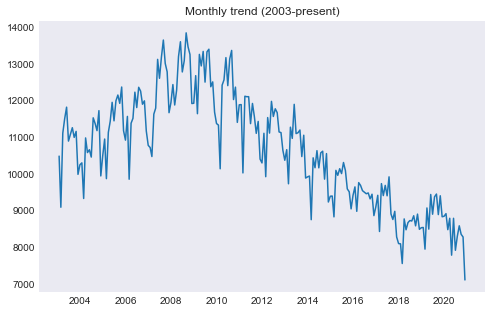

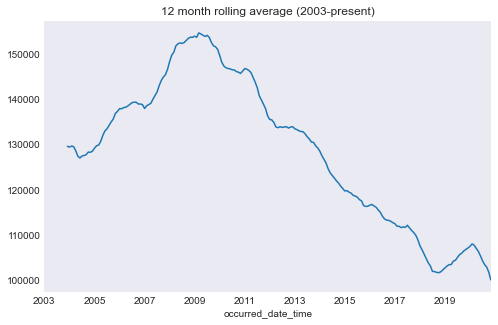

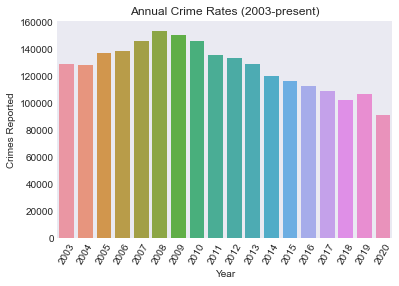

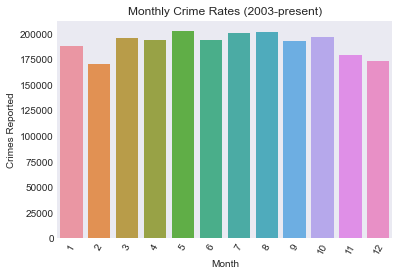

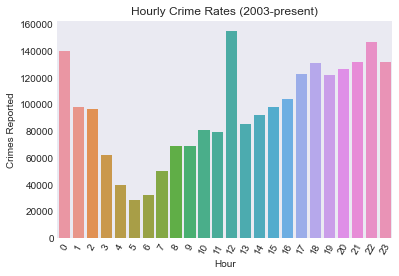

In [6]:
# Plotting overall trend on a monthly basis
plt.figure(figsize=(8, 5))
plt.plot(df.resample("M").size())
plt.title("Monthly trend (2003-present)")
plt.show()

# Above plot re-shown with a rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().rolling(12).sum().plot()
plt.title("12 month rolling average (2003-present)")
plt.show()

print("===============================================================================")
print("===============================================================================")

# Visualizing overall yearly crime rate since 2003
crimes_per_year = df["year"].value_counts().sort_index()
g = sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values)
g.set_xticklabels(g.get_xticklabels(), rotation=60)
g.set(
    xlabel="Year", ylabel="Crimes Reported", title="Annual Crime Rates (2003-present)"
)
plt.show()

# Overall monthly crime rate
crimes_per_month = df["month"].value_counts().sort_index()
d = sns.barplot(x=crimes_per_month.index, y=crimes_per_month.values)
d.set_xticklabels(d.get_xticklabels(), rotation=60)
d.set(
    xlabel="Month", ylabel="Crimes Reported", title="Monthly Crime Rates (2003-present)"
)
plt.show()

# Overall hourly crime rates as well
crimes_per_hour = df["hour"].value_counts().sort_index()
e = sns.barplot(x=crimes_per_hour.index, y=crimes_per_hour.values)
e.set_xticklabels(e.get_xticklabels(), rotation=60)
e.set(
    xlabel="Hour", ylabel="Crimes Reported", title="Hourly Crime Rates (2003-present)"
)
plt.show()

#### Top 25 crime types 

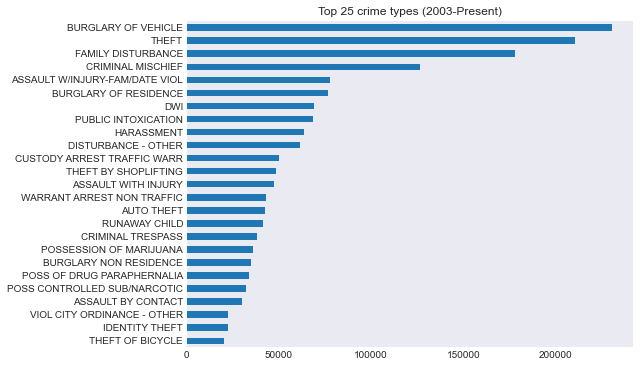

In [7]:
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(8, 6), title="Top 25 crime types (2003-Present)"
)

<a id='q1'></a>
### A. Question 1. What areas of Austin have the highest crime rates? 

78741.0    205767
78753.0    177858
78701.0    167806
78758.0    158216
78704.0    153820
78745.0    149993
78702.0    136275
78744.0    125618
78723.0    117696
78752.0     84031
78748.0     67660
78759.0     65900
78751.0     63782
78757.0     57524
78705.0     56798
78721.0     47485
78749.0     40224
78724.0     37470
78727.0     35620
78703.0     35030
78731.0     28472
78746.0     27992
78729.0     25293
78750.0     23534
78754.0     22617
Name: zip_code, dtype: int64

----------------------------------


78741.0    0.090458
78753.0    0.078188
78701.0    0.073769
78758.0    0.069554
78704.0    0.067621
78745.0    0.065939
78702.0    0.059908
78744.0    0.055223
78723.0    0.051741
78752.0    0.036941
78748.0    0.029744
78759.0    0.028970
78751.0    0.028039
78757.0    0.025288
78705.0    0.024969
78721.0    0.020875
78749.0    0.017683
78724.0    0.016472
78727.0    0.015659
78703.0    0.015400
78731.0    0.012517
78746.0    0.012306
78729.0    0.011119
78750.0    0.010346
78754.0    0.009943
Name: zip_code, dtype: float64

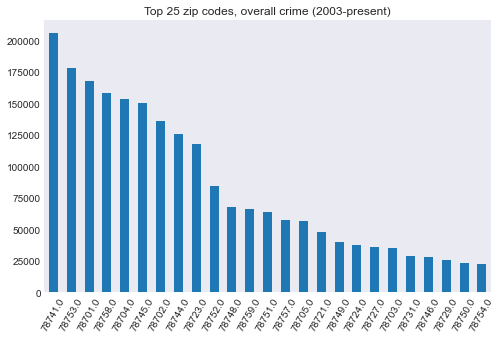

In [8]:
# Create and show dataframe for crime rates by zipcode and then as percentages
zip_codes = df.zip_code.value_counts().head(25)
display(zip_codes)
print("----------------------------------")
display(df.zip_code.value_counts(normalize=True).head(25))


# Visualizing the top 25 areas for crime
df.zip_code.value_counts().head(25).plot.bar(
    rot=60, title="Top 25 zip codes, overall crime (2003-present)", figsize=(8, 5)
)

#### Taking a closer look at particular areas... 

The next section will examine the zip codes 78701 (downtown), 78753, 78741, and 78745.

<a id='q2'></a>
### B. Question 2. How is crime distributed in 78701? 

PUBLIC INTOXICATION               17141
THEFT                             15695
BURGLARY OF VEHICLE                9230
WARRANT ARREST NON TRAFFIC         8968
DWI                                8292
ASSAULT WITH INJURY                7476
VIOL CITY ORDINANCE - OTHER        6187
POSS OF DRUG PARAPHERNALIA         6019
CRIMINAL MISCHIEF                  5775
CRIMINAL TRESPASS                  3891
POSSESSION OF MARIJUANA            3374
DISTURBANCE - OTHER                3332
CUSTODY ARREST TRAFFIC WARR        3001
POSS CONTROLLED SUB/NARCOTIC       2886
CAMPING IN PARK                    2791
VOCO - ALCOHOL  CONSUMPTION        2690
CRIMINAL TRESPASS/TRANSIENT        2573
ASSAULT BY CONTACT                 2563
THEFT OF BICYCLE                   2496
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2130
DOC FIGHTING                       2102
PROTECTIVE ORDER                   2101
ASSAULT W/INJURY-FAM/DATE VIOL     1721
Name: highest_offense_description, dtype

----------------------------------


PUBLIC INTOXICATION               0.102148
THEFT                             0.093531
BURGLARY OF VEHICLE               0.055004
WARRANT ARREST NON TRAFFIC        0.053443
DWI                               0.049414
ASSAULT WITH INJURY               0.044551
VIOL CITY ORDINANCE - OTHER       0.036870
POSS OF DRUG PARAPHERNALIA        0.035869
CRIMINAL MISCHIEF                 0.034415
CRIMINAL TRESPASS                 0.023187
POSSESSION OF MARIJUANA           0.020107
DISTURBANCE - OTHER               0.019856
CUSTODY ARREST TRAFFIC WARR       0.017884
POSS CONTROLLED SUB/NARCOTIC      0.017198
CAMPING IN PARK                   0.016632
VOCO - ALCOHOL  CONSUMPTION       0.016030
CRIMINAL TRESPASS/TRANSIENT       0.015333
ASSAULT BY CONTACT                0.015274
THEFT OF BICYCLE                  0.014874
URINATING IN PUBLIC PLACE         0.013921
FAMILY DISTURBANCE                0.012693
DOC FIGHTING                      0.012526
PROTECTIVE ORDER                  0.012520
ASSAULT W/I

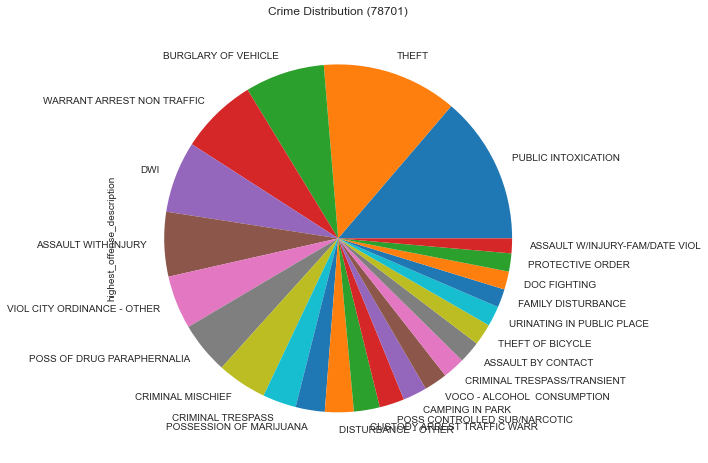

In [9]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
print("----------------------------------")
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### C. Question 2. How is crime distributed in 78753? 

THEFT                             17054
BURGLARY OF VEHICLE               15899
FAMILY DISTURBANCE                14528
CRIMINAL MISCHIEF                  9385
THEFT BY SHOPLIFTING               7598
ASSAULT W/INJURY-FAM/DATE VIOL     7095
BURGLARY OF RESIDENCE              6038
DWI                                4954
DISTURBANCE - OTHER                4731
CUSTODY ARREST TRAFFIC WARR        4342
HARASSMENT                         4213
AUTO THEFT                         4156
POSS OF DRUG PARAPHERNALIA         3719
PUBLIC INTOXICATION                3362
ASSAULT WITH INJURY                3281
CRIMINAL TRESPASS                  3123
POSS CONTROLLED SUB/NARCOTIC       2961
RUNAWAY CHILD                      2915
WARRANT ARREST NON TRAFFIC         2793
POSSESSION OF MARIJUANA            2694
BURGLARY NON RESIDENCE             2480
VIOL CITY ORDINANCE - OTHER        1865
Name: highest_offense_description, dtype: int64

----------------------------------


THEFT                             0.095885
BURGLARY OF VEHICLE               0.089392
FAMILY DISTURBANCE                0.081683
CRIMINAL MISCHIEF                 0.052767
THEFT BY SHOPLIFTING              0.042719
ASSAULT W/INJURY-FAM/DATE VIOL    0.039891
BURGLARY OF RESIDENCE             0.033948
DWI                               0.027854
DISTURBANCE - OTHER               0.026600
CUSTODY ARREST TRAFFIC WARR       0.024413
HARASSMENT                        0.023687
AUTO THEFT                        0.023367
POSS OF DRUG PARAPHERNALIA        0.020910
PUBLIC INTOXICATION               0.018903
ASSAULT WITH INJURY               0.018447
CRIMINAL TRESPASS                 0.017559
POSS CONTROLLED SUB/NARCOTIC      0.016648
RUNAWAY CHILD                     0.016389
WARRANT ARREST NON TRAFFIC        0.015704
POSSESSION OF MARIJUANA           0.015147
BURGLARY NON RESIDENCE            0.013944
VIOL CITY ORDINANCE - OTHER       0.010486
Name: highest_offense_description, dtype: float64

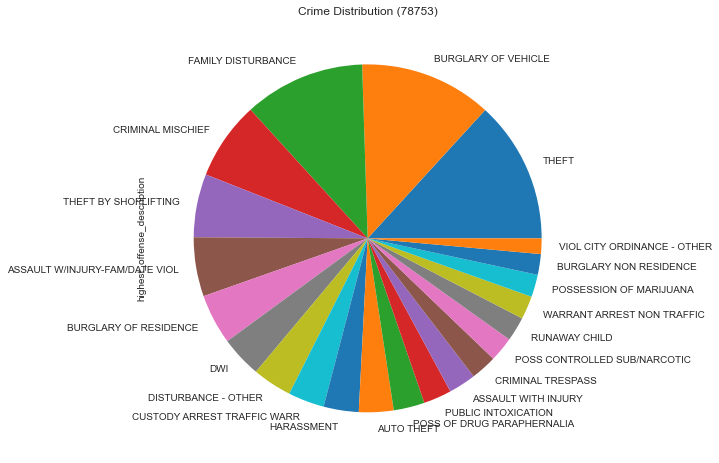

In [10]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]


# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)


# Display the different crime values & then as percentages
display(df_53_off)
print("----------------------------------")
display(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### D. Question 4. How is crime distributed in 78741? 

FAMILY DISTURBANCE                20211
BURGLARY OF VEHICLE               19745
THEFT                             15523
CRIMINAL MISCHIEF                 10990
ASSAULT W/INJURY-FAM/DATE VIOL     9592
BURGLARY OF RESIDENCE              8850
PUBLIC INTOXICATION                6373
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5632
HARASSMENT                         5466
DISTURBANCE - OTHER                5137
AUTO THEFT                         4575
ASSAULT WITH INJURY                4517
CRIMINAL TRESPASS                  3888
POSS CONTROLLED SUB/NARCOTIC       3842
POSSESSION OF MARIJUANA            3791
THEFT BY SHOPLIFTING               3568
POSS OF DRUG PARAPHERNALIA         3529
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2781
VIOL CITY ORDINANCE - OTHER        2196
Name: highest_offense_description, dtype: int64

----------------------------------


FAMILY DISTURBANCE                0.098223
BURGLARY OF VEHICLE               0.095958
THEFT                             0.075440
CRIMINAL MISCHIEF                 0.053410
ASSAULT W/INJURY-FAM/DATE VIOL    0.046616
BURGLARY OF RESIDENCE             0.043010
PUBLIC INTOXICATION               0.030972
CUSTODY ARREST TRAFFIC WARR       0.029213
DWI                               0.027371
HARASSMENT                        0.026564
DISTURBANCE - OTHER               0.024965
AUTO THEFT                        0.022234
ASSAULT WITH INJURY               0.021952
CRIMINAL TRESPASS                 0.018895
POSS CONTROLLED SUB/NARCOTIC      0.018672
POSSESSION OF MARIJUANA           0.018424
THEFT BY SHOPLIFTING              0.017340
POSS OF DRUG PARAPHERNALIA        0.017150
WARRANT ARREST NON TRAFFIC        0.016757
RUNAWAY CHILD                     0.013515
VIOL CITY ORDINANCE - OTHER       0.010672
Name: highest_offense_description, dtype: float64

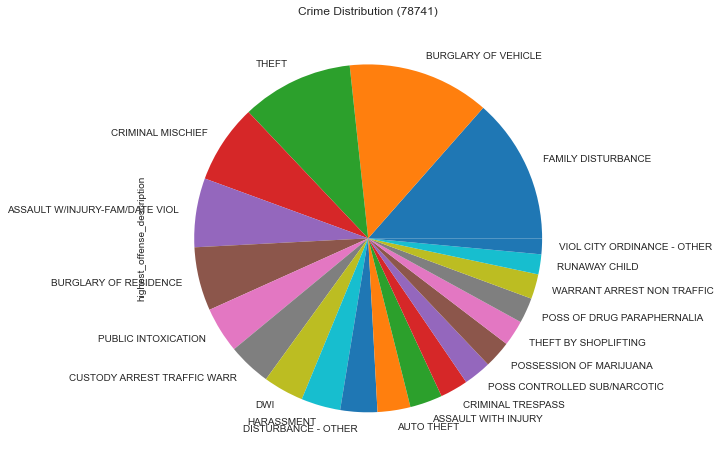

In [11]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]


# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)


# Display the different crime values & then as percentages
display(df_41_off)
print("----------------------------------")
display(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### E. Question 5. How is crime distributed in 78745?

FAMILY DISTURBANCE                14815
BURGLARY OF VEHICLE               14727
THEFT                             13492
CRIMINAL MISCHIEF                  8459
BURGLARY OF RESIDENCE              5855
ASSAULT W/INJURY-FAM/DATE VIOL     5728
HARASSMENT                         5106
DISTURBANCE - OTHER                4487
DWI                                4394
PUBLIC INTOXICATION                3990
CUSTODY ARREST TRAFFIC WARR        3244
BURGLARY NON RESIDENCE             2914
AUTO THEFT                         2818
ASSAULT WITH INJURY                2645
RUNAWAY CHILD                      2589
POSSESSION OF MARIJUANA            2584
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2010
THEFT BY SHOPLIFTING               1963
CRIMINAL TRESPASS                  1941
IDENTITY THEFT                     1555
POSS OF DRUG PARAPHERNALIA         1514
Name: highest_offense_description, dtype: int64

----------------------------------


FAMILY DISTURBANCE                0.098771
BURGLARY OF VEHICLE               0.098185
THEFT                             0.089951
CRIMINAL MISCHIEF                 0.056396
BURGLARY OF RESIDENCE             0.039035
ASSAULT W/INJURY-FAM/DATE VIOL    0.038188
HARASSMENT                        0.034042
DISTURBANCE - OTHER               0.029915
DWI                               0.029295
PUBLIC INTOXICATION               0.026601
CUSTODY ARREST TRAFFIC WARR       0.021628
BURGLARY NON RESIDENCE            0.019428
AUTO THEFT                        0.018788
ASSAULT WITH INJURY               0.017634
RUNAWAY CHILD                     0.017261
POSSESSION OF MARIJUANA           0.017227
WARRANT ARREST NON TRAFFIC        0.014054
POSS CONTROLLED SUB/NARCOTIC      0.013401
THEFT BY SHOPLIFTING              0.013087
CRIMINAL TRESPASS                 0.012941
IDENTITY THEFT                    0.010367
POSS OF DRUG PARAPHERNALIA        0.010094
Name: highest_offense_description, dtype: float64

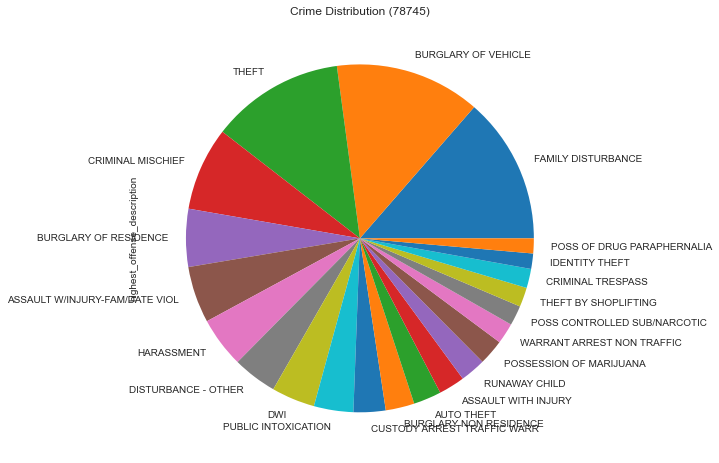

In [12]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]


# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)


# Display the different crime values & then as percentages
display(df_45_off)
print("----------------------------------")
display(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### F. Question 6. How is crime distributed in 78705?

BURGLARY OF VEHICLE               8588
THEFT                             5583
CRIMINAL MISCHIEF                 4943
THEFT OF BICYCLE                  3448
PUBLIC INTOXICATION               2625
BURGLARY OF RESIDENCE             2117
WARRANT ARREST NON TRAFFIC        1547
CRIMINAL TRESPASS                 1335
AUTO THEFT                        1292
ASSAULT WITH INJURY               1241
DWI                               1225
HARASSMENT                        1203
FAMILY DISTURBANCE                1175
DISTURBANCE - OTHER               1109
BURGLARY NON RESIDENCE             871
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        791
CUSTODY ARREST TRAFFIC WARR        783
GRAFFITI                           775
ASSAULT W/INJURY-FAM/DATE VIOL     685
POSSESSION OF MARIJUANA            656
ASSAULT BY CONTACT                 612
Name: highest_offense_description, dtype: int64

----------------------------------


BURGLARY OF VEHICLE               0.151203
THEFT                             0.098296
CRIMINAL MISCHIEF                 0.087028
THEFT OF BICYCLE                  0.060706
PUBLIC INTOXICATION               0.046216
BURGLARY OF RESIDENCE             0.037272
WARRANT ARREST NON TRAFFIC        0.027237
CRIMINAL TRESPASS                 0.023504
AUTO THEFT                        0.022747
ASSAULT WITH INJURY               0.021849
DWI                               0.021568
HARASSMENT                        0.021180
FAMILY DISTURBANCE                0.020687
DISTURBANCE - OTHER               0.019525
BURGLARY NON RESIDENCE            0.015335
CRIMINAL TRESPASS/TRANSIENT       0.015282
VIOL CITY ORDINANCE - OTHER       0.013927
CUSTODY ARREST TRAFFIC WARR       0.013786
GRAFFITI                          0.013645
ASSAULT W/INJURY-FAM/DATE VIOL    0.012060
POSSESSION OF MARIJUANA           0.011550
ASSAULT BY CONTACT                0.010775
Name: highest_offense_description, dtype: float64

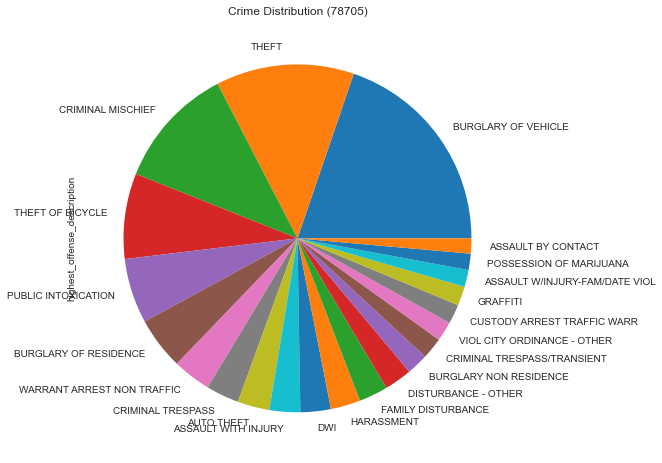

In [13]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]


# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)


# Display the different crime values & then as percentages
display(df_05_off)
print("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. Question 7. How are violent crimes, in particular murder, capital murder, aggrivated assault, and rape distributed? 

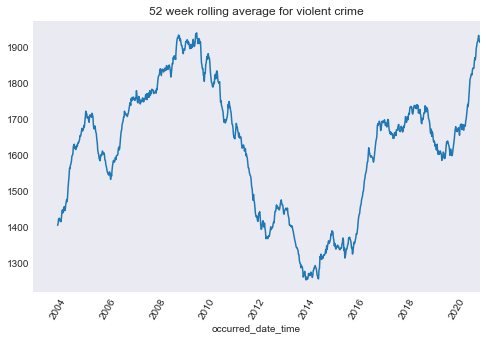

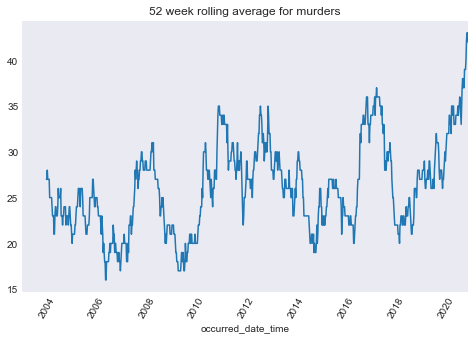

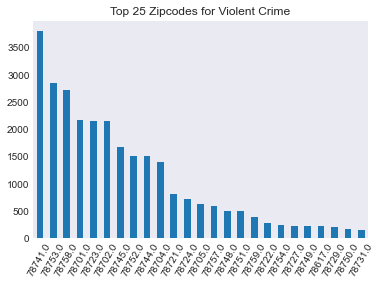

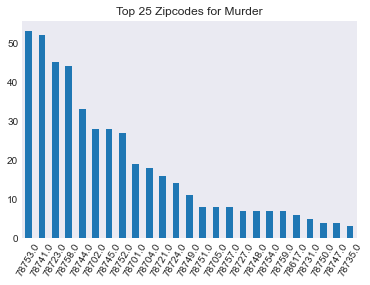

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,14,11,0,1,6
78617.0,120,62,0,6,36
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,66,27,0,2,17
78664.0,3,0,0,0,0


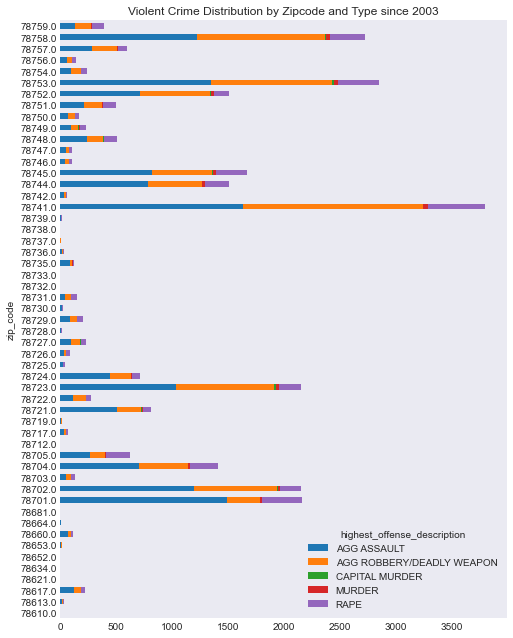

----------------------------------


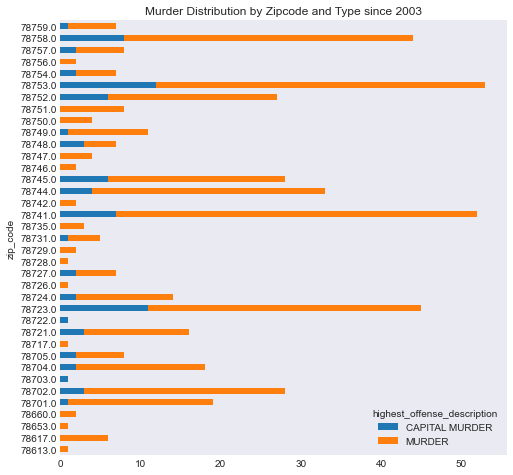

In [14]:
# Creating an overall and separate dataframes for violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_mur = df[df.highest_offense_description == "MURDER"]
df_mur_cap = df[df.highest_offense_description == "CAPITAL MURDER"]
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]
df_rape = df[df.highest_offense_description == "RAPE"]


# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]


# Visualizing overall violent crime trend
# viol_per_year = df_viol["year"].value_counts().sort_index()
# viol_per_year.plot.bar(
#    rot=60, figsize=(10, 5), title="Annual violent crime counts (2003-present)"
# )
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(df_viol.resample("Q").size())
# plt.title("Monthly trend (2003-Present)")
# plt.show()

# As rolling average
df_viol.resample("W").size().rolling(52).sum().plot(
    rot=60, figsize=(8, 5), title="52 week rolling average for violent crime"
)
plt.show()


# Visualizing overall murders
# mur_per_year = df_viol_mur.year.value_counts().sort_index()
# mur_per_year.plot.bar(
#    rot=60, figsize=(10, 5), title="Annual murder counts (2003-present)"
# )
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(df_viol_mur.resample("Q").size())
# plt.title("Monthly trend (2003-Present)")
# plt.show()

# As rolling average
df_viol_mur.resample("W").size().rolling(52).sum().plot(
    rot=60, figsize=(8, 5), title="52 week rolling average for murders"
)
plt.show()

print("==============================================================================")
print("==============================================================================")

# Visualizing yearly violent crime trends for 2017 - 2020
# Overall violent crime by Zipcode
# display(df_viol.zip_code.value_counts(normalize=True).head(25))
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 Zipcodes for Violent Crime", rot=60
)
plt.show()

# display(df_viol_mur.zip_code.value_counts(normalize=True).head(25))
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 Zipcodes for Murder", rot=60
)
plt.show()


# Calculating and visualizing frequency rate of violent crimes by zipcode
viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
display(viol_freq)
viol_freq.plot.barh(
    title="Violent Crime Distribution by Zipcode and Type since 2003",
    figsize=(8, 11),
    stacked=True,
)
plt.show()

print("----------------------------------")

# Calculating and visualizing frequency rate of murders by zipcode
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
mur_freq.plot.barh(
    figsize=(8, 8),
    title="Murder Distribution by Zipcode and Type since 2003",
    stacked=True,
)
plt.show()

#### Here I broke down the overall  and violent crime dataframes into annual parts, then displaying their rolling averages to compare more closely. 2017-Present.

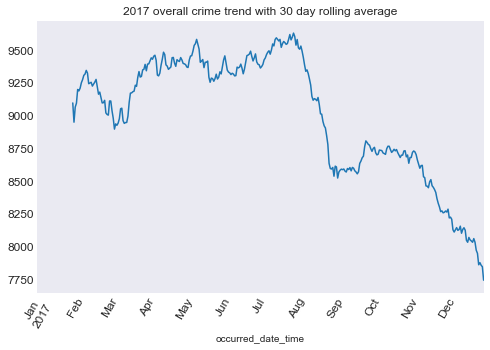

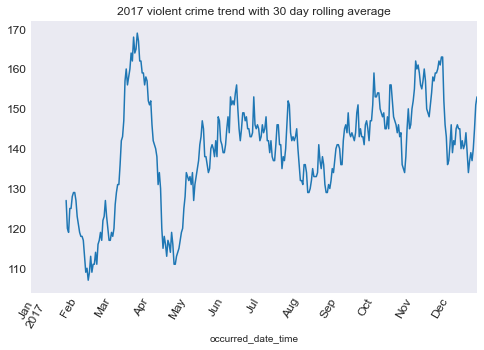

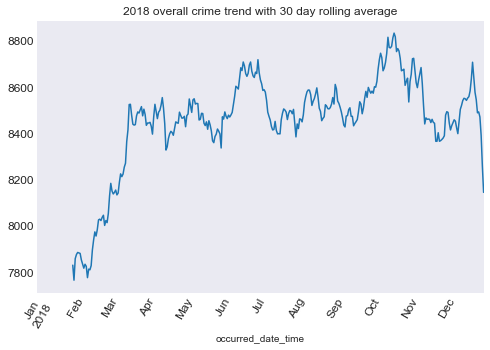

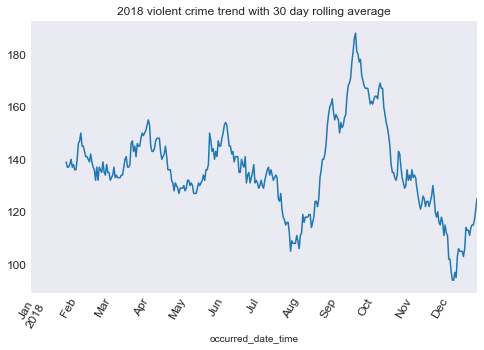

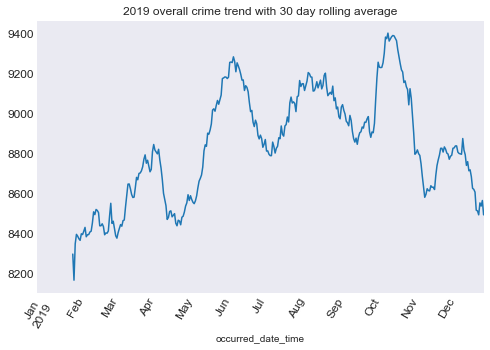

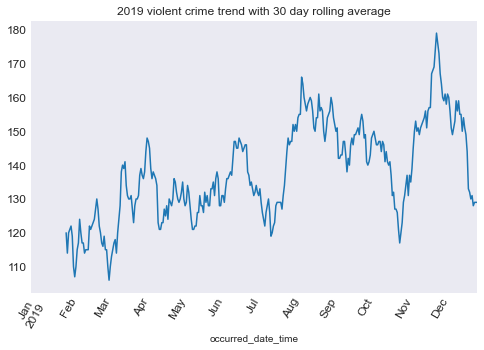

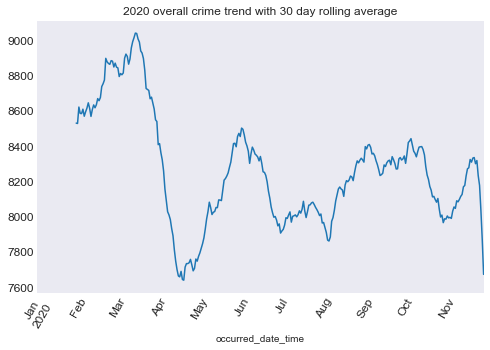

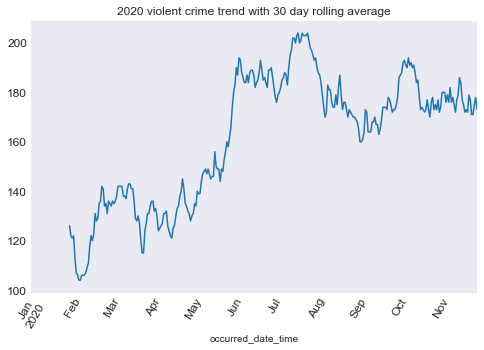

In [15]:
df_17.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2017 overall crime trend with 30 day rolling average",
)
plt.show()

df_viol_17.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2017 violent crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_18.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2018 overall crime trend with 30 day rolling average",
)
plt.show()

df_viol_18.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2018 violent crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_19.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2019 overall crime trend with 30 day rolling average",
)
plt.show()

df_viol_19.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2019 violent crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_20.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2020 overall crime trend with 30 day rolling average",
)
plt.show()

df_viol_20.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2020 violent crime trend with 30 day rolling average",
)
plt.show()

# ax = df_20.plot(x="year", figsize=(10, 6), label="overall crime")
# df_viol_20.plot(x="year", label="violent crime", ax=ax, rot=60)
# plt.show()

<a id='q8'></a>
### H. Question 8. How is crime distributed across different districts and sectors around Austin? Location types?

#### checking council districts, APD districts, and sectors for overall crime rates 

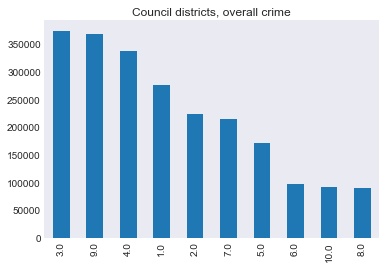

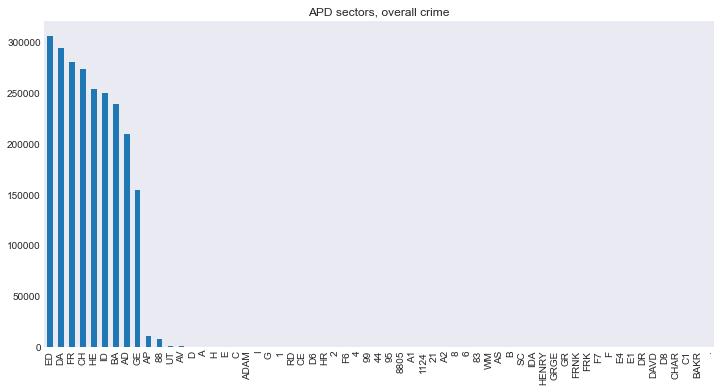

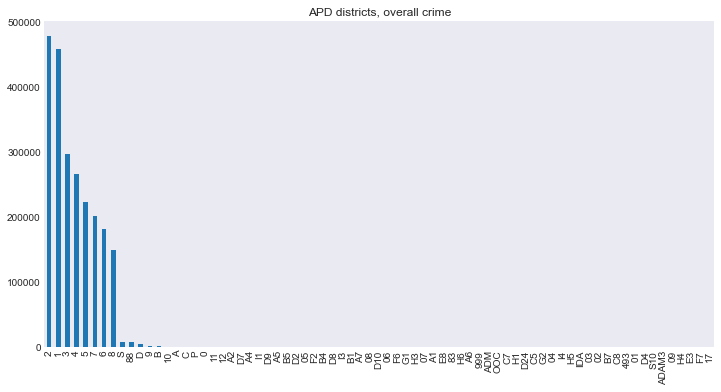

In [16]:
df.council_district.value_counts().plot.bar(title="Council districts, overall crime")
plt.show()

df.apd_sector.value_counts().plot.bar(
    title="APD sectors, overall crime", figsize=(12, 6)
)
plt.show()

df.apd_district.value_counts().plot.bar(
    title="APD districts, overall crime", figsize=(12, 6)
)
plt.show()

#### Distribution of violent crime and murders across council districts and APD sectors 

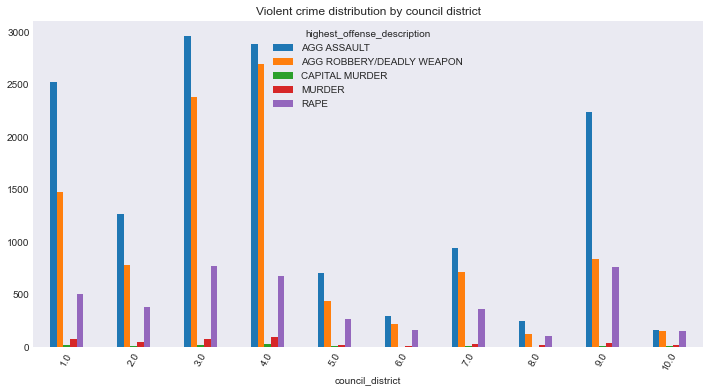

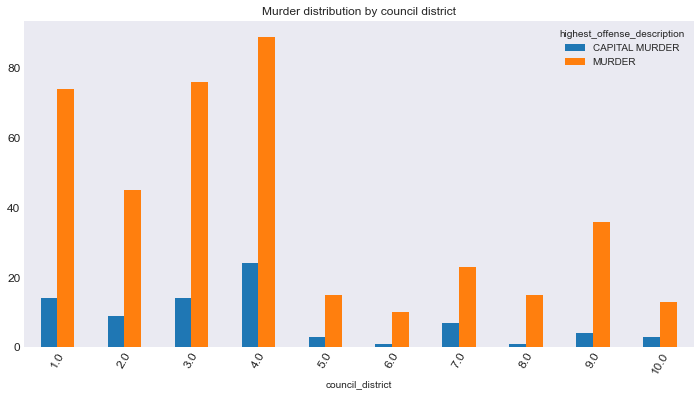

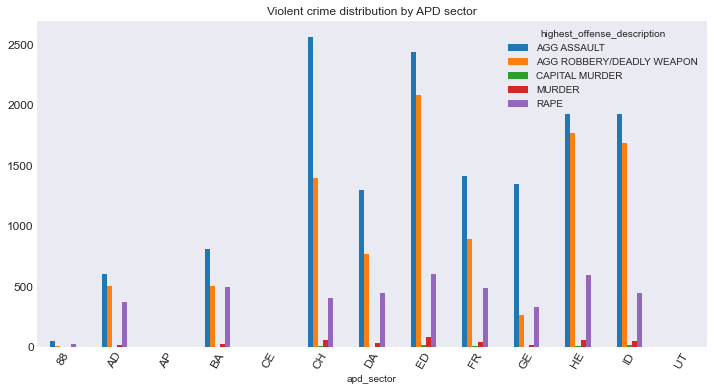

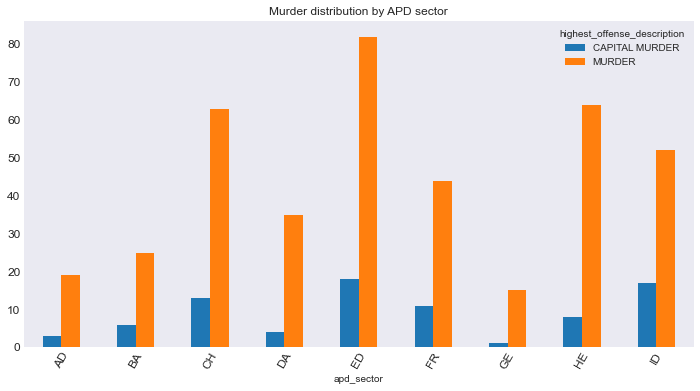

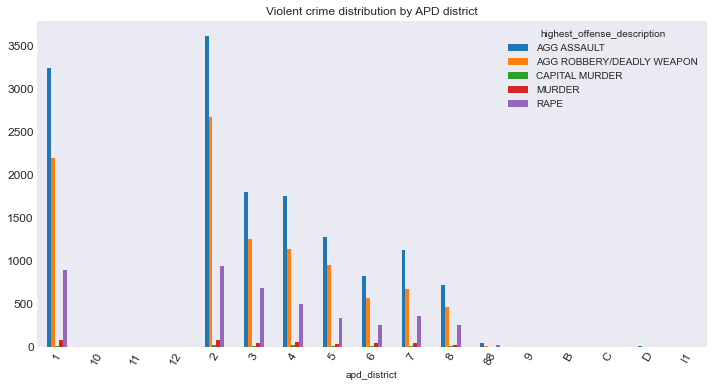

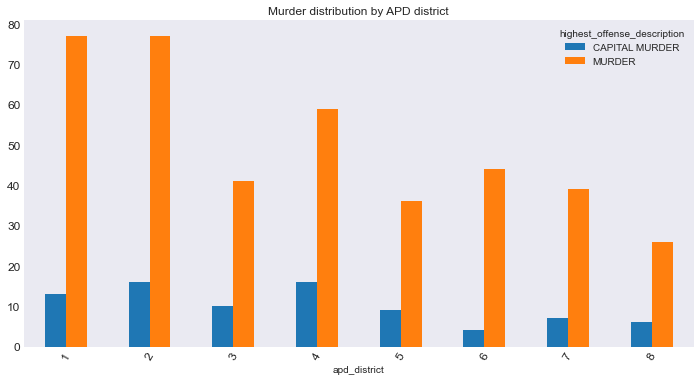

In [17]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    # stacked=True,
    figsize=(12, 6),
    rot=60,
    title="Violent crime distribution by council district",
)
plt.show()


pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(
    figsize=(12, 6),
    rot=60,
    fontsize=12,
    title="Murder distribution by council district",
)
plt.show()


pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6),
    # stacked=True,
    rot=60,
    fontsize=12,
    title="Violent crime distribution by APD sector",
)
plt.show()


pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    fontsize=12,
    title="Murder distribution by APD sector",
)
plt.show()


pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6),
    # stacked=True,
    rot=60,
    fontsize=12,
    title="Violent crime distribution by APD district",
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    fontsize=12,
    title="Murder distribution by APD district",
)
plt.show()

#### Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,13,7,0,1,4
AMUSEMENT PARK,0,1,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,2,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,651,45,2,7,77
CAMP / CAMPGROUND,19,2,0,0,2
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


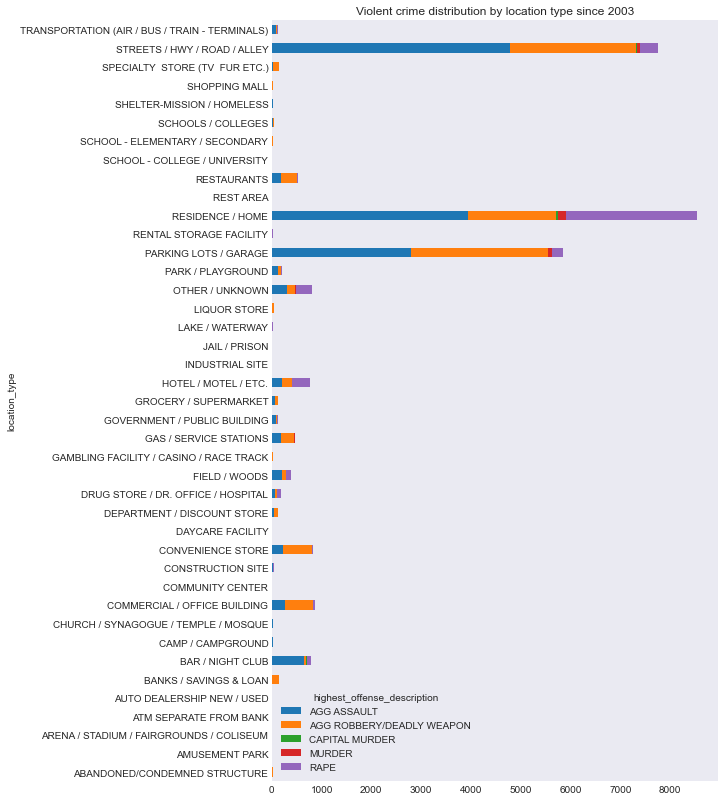

----------------------------------


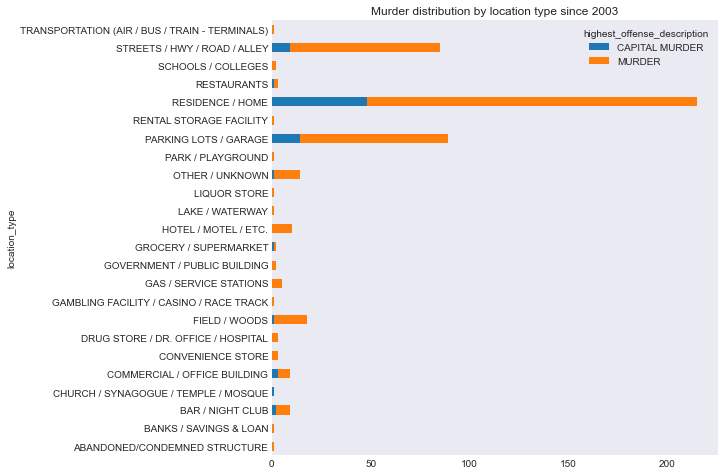

In [18]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.barh(
    figsize=(8, 14),
    stacked=True,
    title="Violent crime distribution by location type since 2003",
)
plt.show()

print("----------------------------------")

mur_loc.plot.barh(
    figsize=(8, 8),
    stacked=True,
    title="Murder distribution by location type since 2003",
)
plt.show()

<a id='q9'></a>
### I. Question 9. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [19]:
# Aggravated assault as a heatmap
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [20]:
# Aggravated robbery as a heatmap
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [21]:
# As a heatmap
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### J. Question 10. Are there any addresses where violent crime and murder occurs frequently?

In [22]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                82
9515 N LAMAR BLVD           66
1700 BURTON DR              62
6409 SPRINGDALE RD          59
00 BLOCK UNKNOWN            59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         54
1071 CLAYTON LN             53
1030 NORWOOD PARK BLVD      53
9200 NORTH PLZ              53
2237 E RIVERSIDE DR         51
1137 GUNTER ST              51
1124 RUTLAND DR             50
Name: address, dtype: int64

In [23]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(31)

8800 N IH 35 SVRD SB         3
4700 E RIVERSIDE DR          3
6407 SPRINGDALE RD           3
6409 SPRINGDALE RD           3
8610 N LAMAR BLVD            3
2501 ANKEN DR                2
2101 ELMONT DR               2
601 E 15TH ST                2
744 W WILLIAM CANNON DR      2
7000 DECKER LN               2
6118 FAIRWAY ST              2
1050 SPRINGDALE RD           2
1711 RUTLAND DR              2
10610 MORADO CIR             2
8912 N LAMAR BLVD            2
2915 S IH 35 SVRD NB         2
1137 GUNTER ST               2
10503 N LAMAR BLVD           2
6600 ED BLUESTEIN BLVD SB    2
833 FAIRFIELD DR             2
9200 NORTH PLZ               2
2713 S CONGRESS AVE          2
605 MASTERSON PASS           2
9010 GALEWOOD DR             2
8225 SAM RAYBURN DR          2
9220 N IH 35 SVRD SB         2
2508 E RIVERSIDE DR          2
9601 MIDDLE FISKVILLE RD     2
201 W 5TH ST                 2
815 W SLAUGHTER LN           2
2400 WICKERSHAM LN           2
Name: address, dtype: int64

## IV. Summary 

Between 2003 and now, crime peaked in 2008 and continued a downward trend until 2019 when it rose again. Since we're still in 2020, we have to wait until the end of the year to see what 2020 yields. 

Out of all the areas in Austin, 78741 has the highest percentage of overall crime at 9.05%. This is a significant 1.23 percentage points higher than the number 2 area 78753 which hosts 7.82% of overall crime.

As we can see, violent crime spiked tremendously after 2018, and especially for 2020 so far.

Years 2010 and 2016 had the most number of murders. However, and alarmingly, as of 11/23/2020, we've now had more murders this year than any other since 2003. Presently, the murder count for 2020 is at 39!!

So, you're most likely to get murdered in July, between 1 and 2am, in the 78753 zip code, with 78741 coming in as a very strong alternate. Good to know!

In [24]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")